In [ ]:
%matplotlib inline

In [1]:
import matplotlib
matplotlib.rc('pdf', fonttype=42)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

# Timeline

In [4]:
_ = (
    pd.read_csv(
        'rehydrated_tweets_count_by_day.csv',
        parse_dates=['day'],
        index_col=['day', 'lang']
   )
    ['count']
    .unstack('lang', fill_value=0)
)

_['total'] = _.sum(axis=1)
_ = _[['lv', 'ru', 'en', 'total']]

timeline = _

In [5]:
timeline.head()

lang,lv,ru,en,total
day,,,,
2017-04-15,1304,358,133,1959
2017-04-16,1463,326,183,2190
2017-04-17,1351,285,174,2000
2017-04-18,2769,378,309,3646
2017-04-19,3137,442,305,4109


In [6]:
'Average tweet number per day: {:.0f}'.format(timeline['total'].mean())

'Average tweet number per day: 3161'

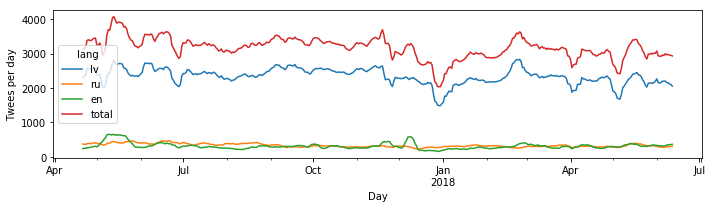

In [7]:
_ = (
    timeline
    .rolling(window=7).mean()
    .plot(figsize=(10, 3))
)

_.set(xlabel='Day', ylabel='Twees per day')


_.figure.tight_layout()
_.figure.savefig('rehydrated_tweets_count_by_day.pdf')

# Source statistics

In [8]:
sources = (
    pd.read_csv(
        'rehydrated_tweets_source_counts.csv',
        index_col=[
            'source_pretty',
            'total_count', 'total_share', 'tracked_source_share',
            'other_lang_count', 'other_lang_share',
            'lang',
        ],
        usecols=[
            'source_pretty',
            'total_count', 'total_share', 'tracked_source_share',
            'other_lang_count', 'other_lang_share',
            'lang',
            'source_lang_count', 'source_lang_share'
        ],
    )
    .unstack('lang', fill_value=0)
)

In [9]:
sources = (
    sources.reorder_levels([1, 0], axis=1)
    .reset_index()
    .set_index('source_pretty').sort_values('total_count', ascending=False)[
        [
            'total_count', 'total_share', 'tracked_source_share',
            'lv', 'ru', 'en',
            'other_lang_count', 'other_lang_share',
        ]
    ]
    .sort_values('total_count', ascending=False)
)

In [10]:
sources

lang                total_count total_share tracked_source_share  \
                                                                   
source_pretty                                                      
Twitter Web Client       456756       34.1%                52.5%   
Twitter for Android      223163       16.6%                 8.3%   
Twitter for iPhone       202459       15.1%                14.0%   
TweetDeck                102685        7.7%                91.7%   
TVNET Login               56604        4.2%                96.7%   
dlvr.it                   44568        3.3%                98.4%   
Facebook                  35606        2.7%                95.1%   
Foursquare                30202        2.3%                 0.0%   
Instagram                 24341        1.8%                 1.7%   
SKATIES                   22347        1.7%                98.1%   

lang                               lv                                  ru  \
                    source_lang_count source_lang_share source_lang_count   
source_pretty                                                               
Twitter Web Client             379874             83.2%             14191   
Twitter for Android            150597             67.5%             22046   
Twitter for iPhone             120950             59.7%             33381   
TweetDeck                      100654             98.0%                74   
TVNET Login                     25791             45.6%             30144   
dlvr.it                         44045             98.8%               132   
Facebook                        13455             37.8%             20414   
Foursquare                      23915             79.2%               218   
Instagram                        8719             35.8%              2416   
SKATIES                         22331             99.9%                 0   

lang                                                 en                    \
                    source_lang_share source_lang_count source_lang_share   
source_pretty                                                               
Twitter Web Client               3.1%             37764              8.3%   
Twitter for Android              9.9%             33798             15.1%   
Twitter for iPhone              16.5%             31048             15.3%   
TweetDeck                        0.1%              1427              1.4%   
TVNET Login                     53.3%                22              0.0%   
dlvr.it                          0.3%               128              0.3%   
Facebook                        57.3%               448              1.3%   
Foursquare                       0.7%              1855              6.1%   
Instagram                        9.9%              8044             33.0%   
SKATIES                             0                 0                 0   

lang                other_lang_count other_lang_share  
                                                       
source_pretty                                          
Twitter Web Client             24927             5.5%  
Twitter for Android            16722             7.5%  
Twitter for iPhone             17080             8.4%  
TweetDeck                        530             0.5%  
TVNET Login                      647             1.1%  
dlvr.it                          263             0.6%  
Facebook                        1289             3.6%  
Foursquare                      4214            14.0%  
Instagram                       5162            21.2%  
SKATIES                           16             0.1%

In [11]:
sources.to_latex('figures/rehydrated_tweets_source_counts.tex')

# Language usage 

In [12]:
rehydrated_tweets_language_counts = (
    pd.read_csv('rehydrated_tweets_language_counts.csv', index_col='lang')
)

In [13]:
rehydrated_tweets_language_counts

,count
lang,
en,132685
lv,990473
ru,141123


In [14]:
(
    (rehydrated_tweets_language_counts / timeline['total'].sum())
    .style.format({'count': '{:.1%}'})
)

,count
lang,
en,9.9%
lv,73.9%
ru,10.5%


In [15]:
_ = (timeline['total'].sum() - rehydrated_tweets_language_counts.sum())[0]

__ = _ / rehydrated_tweets_language_counts.sum()[0]
f'{_}, {__:.1%}'

'76063, 6.0%'

In [16]:
_ = pd.read_csv('rehydrated_tweets_lang_usage.csv', index_col='rnum')

_['Language Uniformity Score'] = (_[['lv', 'ru', 'en']].max(axis=1) / _[['lv', 'ru', 'en']].sum(axis=1)).round(2)

lang_usage = _

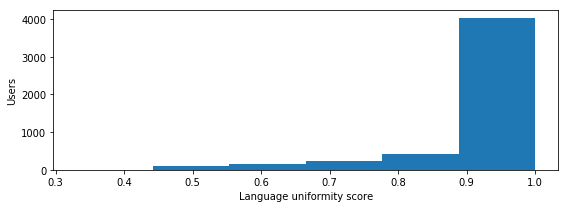

In [17]:
_ = lang_usage['Language Uniformity Score'].plot.hist(bins=6, figsize=(8, 3))

_.set(xlabel="Language uniformity score", ylabel="Users")
_.figure.tight_layout()

_.figure.savefig('rehydrated_tweets_lang_usage.pdf')

In [18]:
lang_usage.sort_values('Language Uniformity Score').head()

,lv,ru,en,total,Language Uniformity Score
rnum,,,,,
3791,7,7,7,30,0.33
1947,13,16,14,74,0.37
1559,16,20,14,97,0.40
4382,7,3,7,24,0.41
4305,4,5,3,25,0.42


# Language preference

## Monolingual

In [19]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] == 0).sum(axis='columns') == 2
    ]
    [['lv', 'ru', 'en']] > 0
).sum(axis='rows')

lv    1547
ru     136
en     309
dtype: int64

## Multilingual

In [20]:
(
    lang_usage[
        (lang_usage[['lv', 'ru', 'en']] > 0).sum(axis='columns') > 1
    ]
    [['lv', 'ru', 'en']]
    .replace(0, np.nan)
    .rank(axis='columns', method='min', ascending=False)
    .apply(lambda c: c.value_counts(), axis='rows')
)

,lv,ru,en
1.0,2193,330,475
2.0,534,226,2272
3.0,95,269,121


# Topics

In [21]:
relevance_judgments_count_by_day = (
    pd.read_csv(
        'relevance_judgments_count_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )['count']
    .unstack('topic_id', fill_value=0)
)

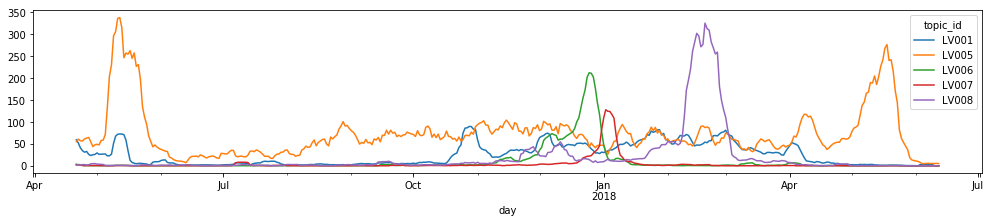

In [22]:
(
    relevance_judgments_count_by_day[
        ['LV001', 'LV005', 'LV006', 'LV007', 'LV008']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

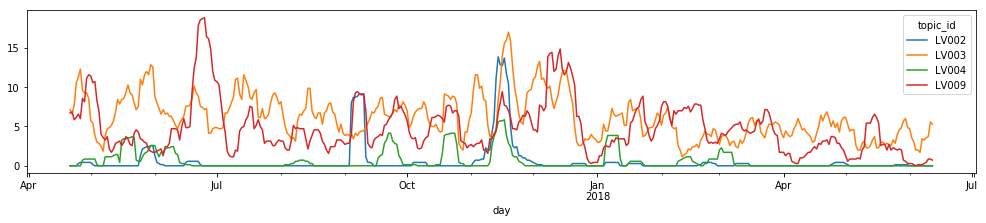

In [23]:
(
    relevance_judgments_count_by_day[['LV002', 'LV003', 'LV004', 'LV009']]
    .rolling(window=7).mean()
    .plot(figsize=(17, 3))
);

In [24]:
_ = (
    pd.read_csv(
        'relevance_judgments_lang_pref_by_day.csv',
        index_col=['day', 'topic_id'],
        parse_dates=['day'],
    )
)

_.columns = pd.MultiIndex.from_tuples(
    [
        ('Counts', 'Total'),
        ('Counts', 'lv, ru, en'),

        ('Tweets', 'lv'),
        ('Tweets', 'ru'),
        ('Tweets', 'en'),

        ('Users', 'lv'),
        ('Users', 'ru'),
        ('Users', 'en'),
    ],
    names=['Type', 'Language']
)
relevance_judgments_lang_pref_by_day = _

In [25]:
relevance_judgments_lang_pref_by_day.head()

Type                Counts            Tweets             Users            
Language             Total lv, ru, en     lv    ru    en    lv    ru    en
day        topic_id                                                       
2017-04-15 LV001        73         72   0.89  0.06  0.06  0.82  0.07  0.10
2017-04-16 LV001        77         77   0.94  0.01  0.05  0.92  0.02  0.05
2017-04-17 LV001        67         63   0.84  0.14  0.02  0.80  0.14  0.06
2017-04-18 LV001        46         46   0.91  0.09  0.00  0.89  0.10  0.01
2017-04-19 LV001        24         24   0.75  0.08  0.17  0.86  0.08  0.06

In [26]:
relevance_judgments_lang_pref_by_day['Counts', 'Total'].groupby(level='topic_id').sum()

topic_id
LV001     9799
LV002      215
LV003     2508
LV004      225
LV005    27426
LV006     3699
LV007     1484
LV008     7549
LV009     1972
LV010     1255
LV011     1078
LV012      496
LV013      802
LV014      672
LV015     1203
LV016     6429
Name: (Counts, Total), dtype: int64

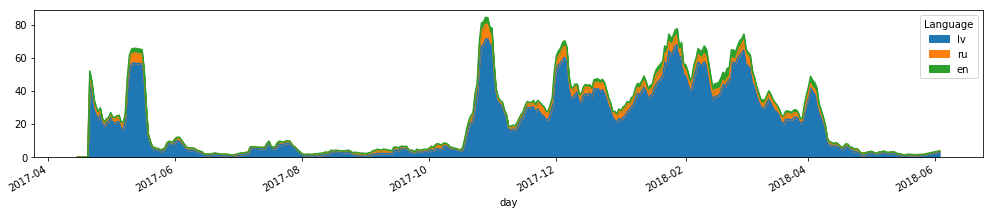

In [27]:
_ = relevance_judgments_lang_pref_by_day.loc[(slice(None), 'LV001'), :].reset_index('topic_id')

(
    _['Users']
    .multiply(
        _['Counts', 'lv, ru, en'],
        axis='rows',
    )
    .rolling(window=7).mean()
    .plot.area(figsize=(17, 3))
);

## Topics 2

In [28]:
_ = pd.read_csv(
    'relevance_judgments_lang_pref.csv',
    index_col=['topic_id', 'day', 'tweet_lang'],
    parse_dates=['day']
)

relevance_judgments_lang_pref = _

In [29]:
relevance_judgments_lang_pref.loc[['LV005']].head()

r_lv  r_ru  r_en
topic_id day        tweet_lang                  
LV005    2017-04-15 lt           0.9   0.0   0.1
         2017-04-16 lv           0.9   0.0   0.1
                    lv           0.9   0.0   0.1
                    lv           1.0   0.0   0.0
                    lv           0.9   0.0   0.1

In [30]:
_ = (
    relevance_judgments_lang_pref
    .groupby(level=['topic_id', 'tweet_lang']).size()
    .unstack('tweet_lang', fill_value=0)
    [['lv', 'ru', 'en']]
)

_total = _.sum(axis='columns')

__ = _.divide(_total, axis='rows')

__['total'] = _total
__.style.format({'lv': '{:.1%}', 'ru': '{:.1%}', 'en': '{:.1%}'})

__.to_latex('figures/topic_lang_counts.tex', float_format='{:.1%}'.format)

__

tweet_lang,lv,ru,en,total
topic_id,,,,
LV001,0.858729,0.097162,0.044109,9726
LV002,0.888372,0.009302,0.102326,215
LV003,0.910579,0.064271,0.025150,2505
LV004,1.000000,0.000000,0.000000,225
LV005,0.952669,0.016842,0.030490,26304
LV006,0.865082,0.046447,0.088471,3617
LV007,0.770279,0.145194,0.084526,1467
LV008,0.953306,0.039910,0.006785,7517
LV009,0.851118,0.047256,0.101626,1968


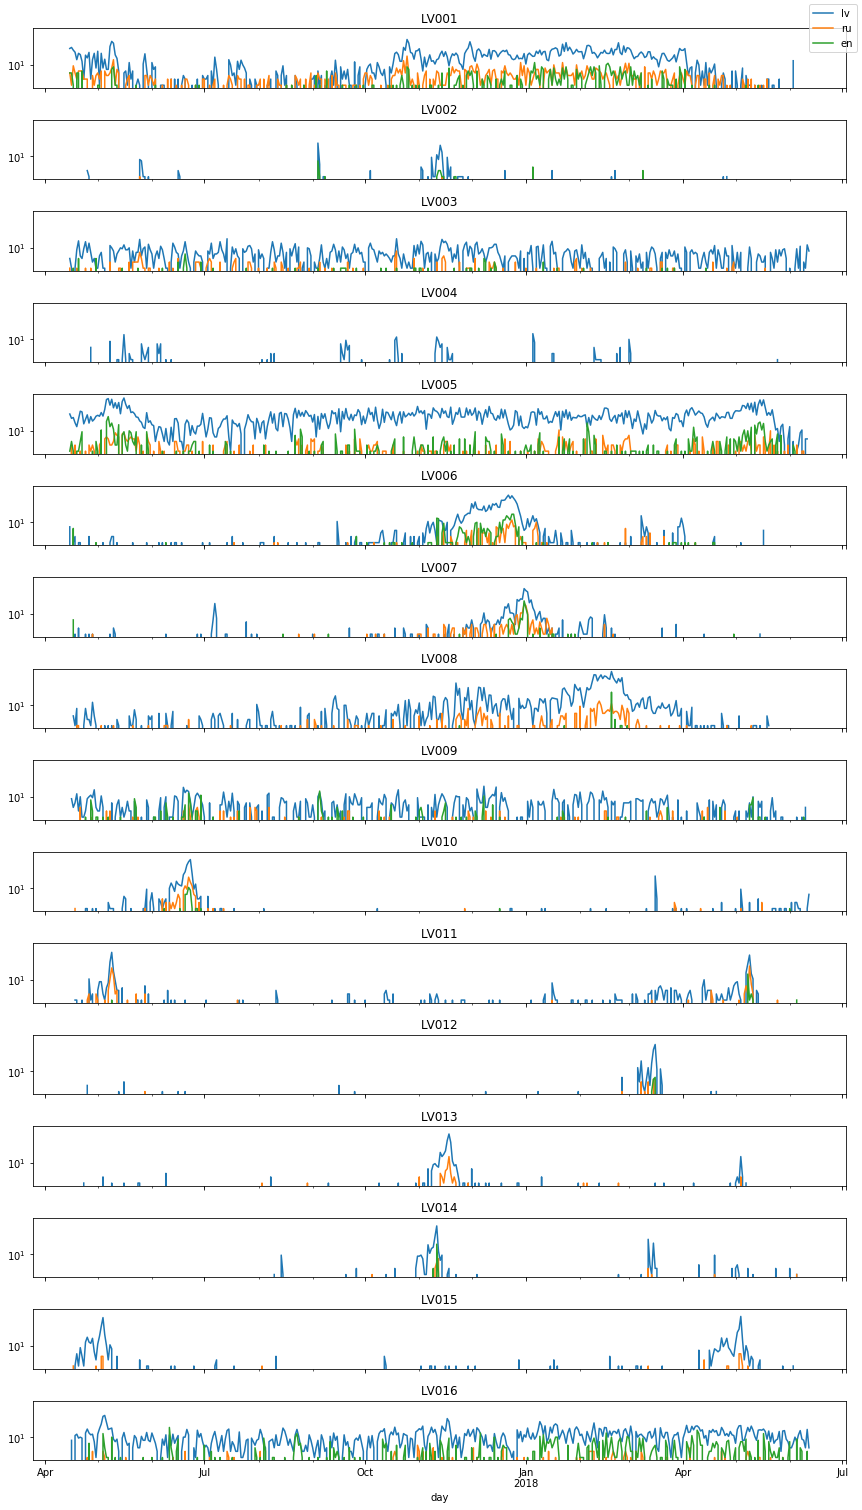

In [40]:
_data = (
    relevance_judgments_lang_pref
    .groupby(level=['topic_id', 'day' ,'tweet_lang']).size()
    .unstack('tweet_lang', fill_value=0)
    [['lv', 'ru', 'en']]
)


topics = [
    'LV001', 'LV002', 'LV003', 'LV004', 'LV005', 'LV006', 'LV007', 'LV008', 'LV009',
    'LV010', 'LV011', 'LV012', 'LV013', 'LV014', 'LV015', 'LV016',
 ]

fig, axs = plt.subplots(len(topics), 1, sharex=True, sharey=True, figsize=(12, 21))

axs = axs.flatten()


for topic, ax in zip (topics, axs):

    _ = (
        _data.loc[topic]
        .resample('1d', level='day').sum()
        .plot.line(ax=ax, logy=True, legend=False, title=topic)
    );
    
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

fig.tight_layout()
fig.savefig('topic_timeline.pdf')